In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# $\star$ Question 2: 
Estimate the mean and covariance matrix of the dataset *gaussian.npz* via ML
estimation.

Plot the points and indicate the mean via a cross and the covariance via an
ellipse. 

Consult the matplotlib documentation to see how to draw an ellipse. 
(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Ellipse.html)


You obtain the ellipse axes by an eigen-decomposition of the matrix (Numpy function linalg.eig). 

The scaling of the axes is given by the eigenvalues. Review the concept of an eigen-decomposition in the
internet or a math book if you lack this basic math knowledge.

# Question 2.1: Mean and Covariance estimation 
Estimate the mean and covariance matrix of the dataset, you can compare these to the built in numpy functions and see if you see a difference.

In [19]:
gaussian = np.load('../data/gaussian.npz', mmap_mode='r')['arr_0']
gaussian.shape

(100, 2)

In [27]:
N = gaussian.shape[0]
mean = (1 / N) * np.sum(gaussian, axis=0)
x_ = gaussian - mean # Broadcast
var = (1 / N) * (np.dot(x_.T, x_))
print("Mean : {}".format(mean))
print("Mean with Numpy : {}".format(np.mean(gaussian, axis=0)))

print("Variance : {}".format(var))
print("Variance with Numpy : {}".format(np.cov(gaussian.T)))

Mean : [2.12308534 3.12168402]
Mean with Numpy : [2.12308534 3.12168402]
Variance : [[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]
Variance with Numpy : [[1.35117126 2.10306646]
 [2.10306646 4.02666029]]


# Question 2.2: Plotting the graph
Plot the points and indicate the mean via a cross and the covariance via an
ellipse

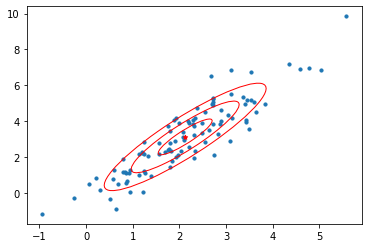

In [60]:
fig, ax = plt.subplots()

eig_values, eig_vectors = np.linalg.eig(var)

for i in range(1, 4):
    ellipse = Ellipse(xy=(mean[0], mean[1]), width=np.sqrt(eig_values[0]) * i,
                  height=np.sqrt(eig_values[1]) * i,
                  angle=np.rad2deg(np.arctan2(eig_vectors[1, 0], eig_vectors[0, 0])),
                 facecolor='none', edgecolor='red')
    ax.add_artist(ellipse)

plt.scatter(gaussian[:, 0], gaussian[:, 1], s=10)
plt.scatter(mean[0], mean[1], marker='*', color='red', s=20)

# $\star\star$ Question 3:
Create reduced datasets by considering only the first 2, 5, 10 points and estimate the mean via MAP. 

Use the ML estimate of the covariance $ \Sigma $ <sub>**ML,100**</sub> (estimated from all 100 points) as known covariance. 

Assume the conjugate prior with $\mu_0 = (2,3)^T $ and covariance $\Sigma_0 =\Sigma $ <sub>**ML,100**</sub>


Draw the ML and the MAP estimates into the point clouds (the covariance is the same as it is assumed to be known here). 

How reliable is the ML estimate when there are only few measurements? 

Now work with a slightly wrong prior $\mu_0 = (2,5)^T $
and see how the effect of the prior is reduced as more measurements come
in.

# Question 3.1: Using the correct prior
Using   $\mu_0 = (2,3)^T $



In [97]:
def MAPEstimator(x, n, mean_0, cov):
    dataset = x[0:n, :]
    cov_0 = cov
    
    cov_n = np.linalg.inv(n * np.linalg.inv(cov) + np.linalg.inv(cov_0))
    mean_n = cov_n @ (np.linalg.inv(cov_0) @ mean_0
                      + n * (np.linalg.inv(cov) @ np.mean(dataset, axis=0)))
    print("Mean using {} data points :".format(n))
    print(mean_n)
    print("Covariance using {} data points : ".format(n))
    print(cov_n)
    
    return mean_n, cov_n

In [101]:
mean_0 = np.array([2, 3]) 
MAPMean_2, MAPCov_2 = MAPEstimator(gaussian, 2, mean_0, var)

Mean using 2 data points :
[2.79051738 4.17201882]
Covariance using 2 data points : 
[[0.44588651 0.69401193]
 [0.69401193 1.32879789]]


In [102]:
MAPMean_5, MAPCov_5 = MAPEstimator(gaussian, 5, mean_0, var)

Mean using 5 data points :
[2.21560731 3.29619296]
Covariance using 5 data points : 
[[0.22294326 0.34700597]
 [0.34700597 0.66439895]]


In [103]:
MAPMean_10, MAPCov_10 = MAPEstimator(gaussian, 10, mean_0, var)

Mean using 10 data points :
[2.56752927 4.00546172]
Covariance using 10 data points : 
[[0.12160541 0.18927598]
 [0.18927598 0.36239943]]


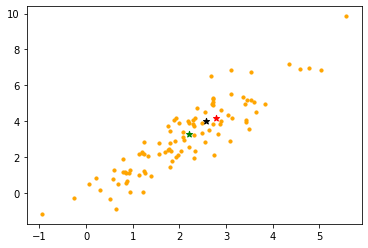

In [106]:
plt.scatter(gaussian[:, 0], gaussian[:, 1], s = 10, color='orange')
plt.scatter(MAPMean_2[0], MAPMean_2[1], s = 40, marker='*', color='red')
plt.scatter(MAPMean_5[0], MAPMean_5[1], s = 40, marker='*', color='green')
plt.scatter(MAPMean_10[0], MAPMean_10[1], s = 40, marker='*', color='black')
plt.show()

# Question 3.2: Using a slightly wrong prior
Using $\mu_0 = (2,5)^T $

Mean using 2 data points :
[2.79051738 4.83868548]
Covariance using 2 data points : 
[[0.44588651 0.69401193]
 [0.69401193 1.32879789]]
Mean using 5 data points :
[2.21560731 3.62952629]
Covariance using 5 data points : 
[[0.22294326 0.34700597]
 [0.34700597 0.66439895]]
Mean using 10 data points :
[2.56752927 4.1872799 ]
Covariance using 10 data points : 
[[0.12160541 0.18927598]
 [0.18927598 0.36239943]]


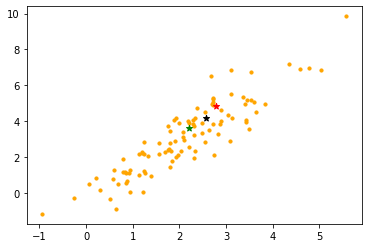

In [107]:
mean_0 = np.array([2, 5])
MAPMean_2, MAPCov_2 = MAPEstimator(gaussian, 2, mean_0, var)
MAPMean_5, MAPCov_5 = MAPEstimator(gaussian, 5, mean_0, var)
MAPMean_10, MAPCov_10 = MAPEstimator(gaussian, 10, mean_0, var)

plt.scatter(gaussian[:, 0], gaussian[:, 1], s = 10, color='orange')
plt.scatter(MAPMean_2[0], MAPMean_2[1], s = 40, marker='*', color='red')
plt.scatter(MAPMean_5[0], MAPMean_5[1], s = 40, marker='*', color='green')
plt.scatter(MAPMean_10[0], MAPMean_10[1], s = 40, marker='*', color='black')
plt.show()

# $\star$ Question 4:
Estimate mean and covariance of the dataset *gaussianplus.npz* using ML and show
the result. How well does the estimate reflect the true data?

In [108]:
gaussian_plus = np.load('../data/gaussianplus.npz', mmap_mode='r')['arr_0']
gaussian_plus.shape

(120, 2)

In [109]:
N = gaussian_plus.shape[0]
mean = (1 / N) * np.sum(gaussian_plus, axis=0)
x_ = gaussian_plus - mean # Broadcast
var = (1 / N) * (np.dot(x_.T, x_))
print("Mean : {}".format(mean))
print("Mean with Numpy : {}".format(np.mean(gaussian_plus, axis=0)))

print("Variance : {}".format(var))
print("Variance with Numpy : {}".format(np.cov(gaussian_plus.T)))

Mean : [2.78150432 3.4206865 ]
Mean with Numpy : [2.78150432 3.4206865 ]
Variance : [[3.37496477 2.68822246]
 [2.68822246 3.8456476 ]]
Variance with Numpy : [[3.40332582 2.71081256]
 [2.71081256 3.87796397]]


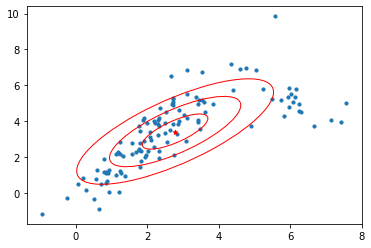

In [110]:
fig, ax = plt.subplots()

eig_values, eig_vectors = np.linalg.eig(var)

for i in range(1, 4):
    ellipse = Ellipse(xy=(mean[0], mean[1]), width=np.sqrt(eig_values[0]) * i,
                  height=np.sqrt(eig_values[1]) * i,
                  angle=np.rad2deg(np.arctan2(eig_vectors[1, 0], eig_vectors[0, 0])),
                 facecolor='none', edgecolor='red')
    ax.add_artist(ellipse)

plt.scatter(gaussian_plus[:, 0], gaussian_plus[:, 1], s=10)
plt.scatter(mean[0], mean[1], marker='*', color='red', s=20)

### Geometry of the Gaussian

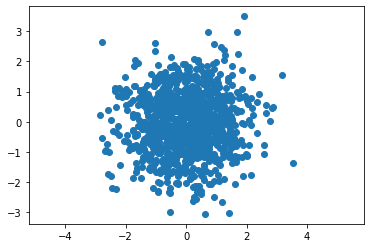

In [5]:
import numpy as np
import matplotlib.pyplot as plt

M = 1000
# Samples froma Normal Distribution
samples = np.random.randn(M, 2)
plt.axis('equal')
plt.scatter(samples[:, 0], samples[:, 1])

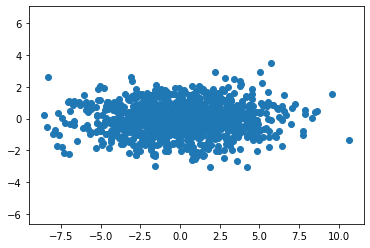

In [7]:
scaling_matrix = np.array([[3, 0], [0, 1]])
samples_scaled = samples @ scaling_matrix
plt.axis('equal')
plt.scatter(samples_scaled[:, 0], samples_scaled[:, 1])

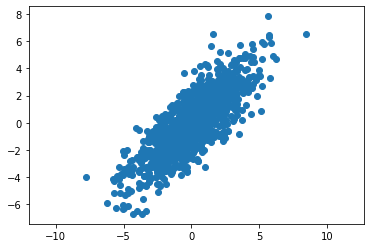

In [13]:
# Rotation
theta = -np.pi / 4
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
samples_scaled_rotated = samples_scaled @ rotation_matrix
plt.axis('equal')
plt.scatter(samples_scaled_rotated[:, 0], samples_scaled_rotated[:, 1])

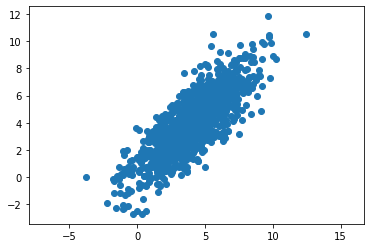

In [14]:
# Shift
mean = np.array([[4], [4]])
samples_scaled_rotated += mean.T

plt.axis('equal')
plt.scatter(samples_scaled_rotated[:, 0], samples_scaled_rotated[:, 1])

In [17]:
np.linalg.eig(samples_scaled_rotated.T @ samples_scaled_rotated)

(array([41470.53065494,  1029.30443595]),
 array([[ 0.70932796, -0.70487861],
        [ 0.70487861,  0.70932796]]))